In [1]:
import pandas as pd
from anndata import AnnData
from scipy.sparse import csr_matrix
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [7]:
adata = sc.read('/n/scratch/users/m/meb521/hyprseq/AML1026_merged_rna_all_clustered.h5ad') # 30k: all barcodes with 30 genes

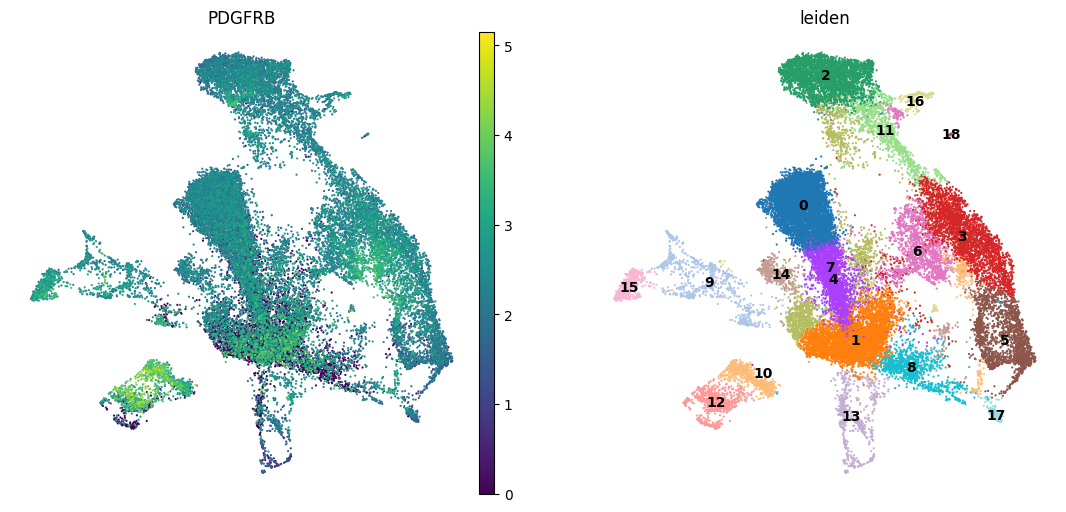

In [3]:
plt.rcParams['figure.figsize'] = (6, 6)
sc.pl.umap(adata, color=['PDGFRB','leiden'],s=10,show=False,frameon=False,legend_loc='on data');

In [4]:
#adata = adata[~adata.obs.leiden.isin(['7','4','14','0','1'])].copy() # will remove clogged
#adata = sc.read('/n/scratch/users/m/meb521/hyprseq/AML1026_merged_rna_all_clustered_withvars_filtered.h5ad') # 16k: clogged filterred

In [8]:
PDGFRB = adata[adata.obs.leiden.isin(['10','12'])].obs.index

In [9]:
adata = sc.read('STAG_AML_scrublet_clustered.h5ad')

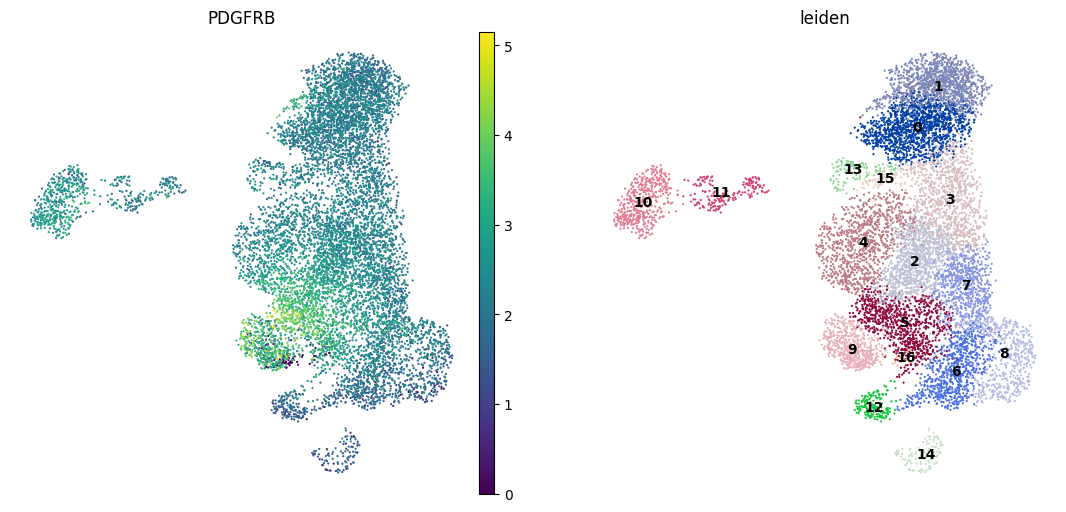

In [10]:
plt.rcParams['figure.figsize'] = (6, 6)
sc.pl.umap(adata, color=['PDGFRB','leiden'],s=10,show=False,frameon=False,legend_loc='on data');

In [11]:
adata.obs['weird_PDGFRB'] = adata.obs.index.isin(PDGFRB)*1

In [12]:
adata.obs['weird_PDGFRB'] = adata.obs['weird_PDGFRB'].astype('category')

[<AxesSubplot:title={'center':'weird_PDGFRB'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>]

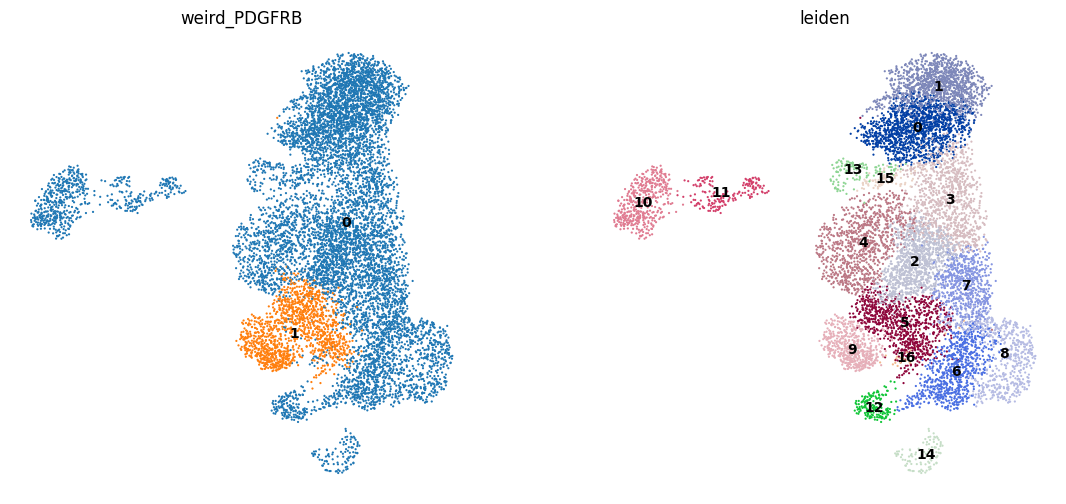

In [13]:
plt.rcParams['figure.figsize'] = (6, 6)
sc.pl.umap(adata, color=['weird_PDGFRB','leiden'],s=10,show=False,frameon=False,legend_loc='on data')

In [14]:
adata = adata[~adata.obs.leiden.isin(['9','5','16'])].copy()

[<AxesSubplot:title={'center':'weird_PDGFRB'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>]

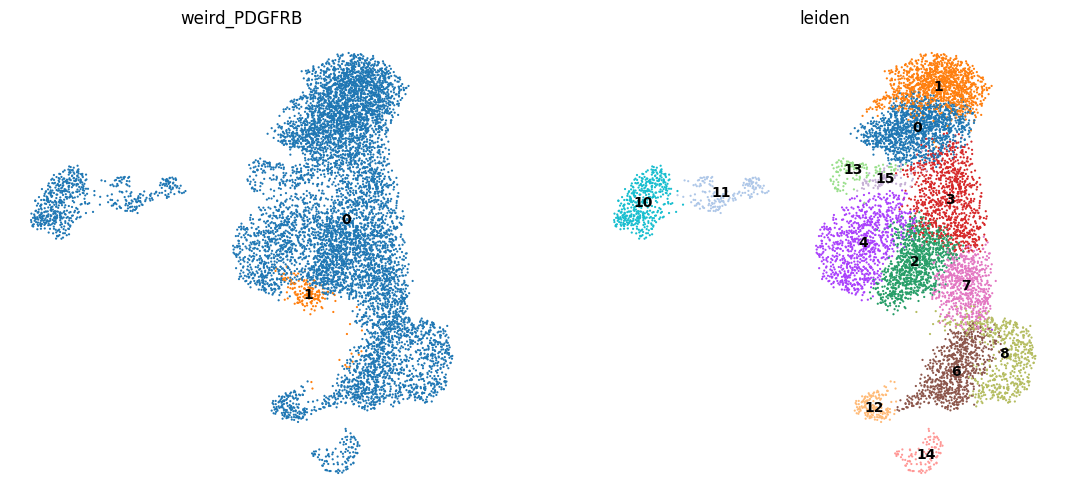

In [15]:
plt.rcParams['figure.figsize'] = (6, 6)
sc.pl.umap(adata, color=['weird_PDGFRB','leiden'],s=10,show=False,frameon=False,legend_loc='on data')

In [16]:
adata = adata[adata.obs.weird_PDGFRB!=1].copy()

In [19]:
adata

AnnData object with n_obs × n_vars = 8285 × 1201
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'log10_genes', 'log10_counts', 'batch', 'leiden', 'GT_chr1:1747229:T/C', 'GT_chr1:115258745:C/G', 'GT_chr2:198266512:C/T', 'GT_chr17:74732959:G/T', 'GT_chr20:31022441:A/AG', 'GT_chrM:8698:G/A', 'GT_chrM:9948:G/A', 'GT_chrM:11252:A/G', 'GT_chrM:11737:T/C', 'GT_chrM:14725:G/A', 'log10_DP_chr1:1747229:T/C', 'log10_DP_chr1:115258745:C/G', 'log10_DP_chr2:198266512:C/T', 'log10_DP_chr17:74732959:G/T', 'log10_DP_chr20:31022441:A/AG', 'log10_DP_chrM:8698:G/A', 'log10_DP_chrM:9948:G/A', 'log10_DP_chrM:11252:A/G', 'log10_DP_chrM:11737:T/C', 'log10_DP_chrM:14725:G/A', 'AD_chr1:1747229:T/C', 'AD_chr1:115258745:C/G', 'AD_chr2:198266512:C/T', 'AD_chr17:74732959:G/T', 'AD_chr20:31022441:A/AG', 'AD_chrM:8698:G/A', 'AD_chrM:9948:G/A', 'AD_chrM:11252:A/G', 'AD_chrM:11737:T/C', 'AD_chrM:14725:G/A', 'ratio_chr1:1747229:T/C', 'ratio_chr1:115258745:C/G', 'ratio_chr2:198266512:C/T', 'ratio_chr17:74732959

In [40]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50) #n_neighbors=8, n_pcs=40)

n_iters= 200
n_trees= 200 old_n_trees= 10


In [41]:
sc.tl.umap(adata, min_dist=1)

In [42]:
sc.tl.leiden(adata, resolution=1) #resolution=.9)

[<AxesSubplot:title={'center':'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'doublet_scores'}, xlabel='UMAP1', ylabel='UMAP2'>]

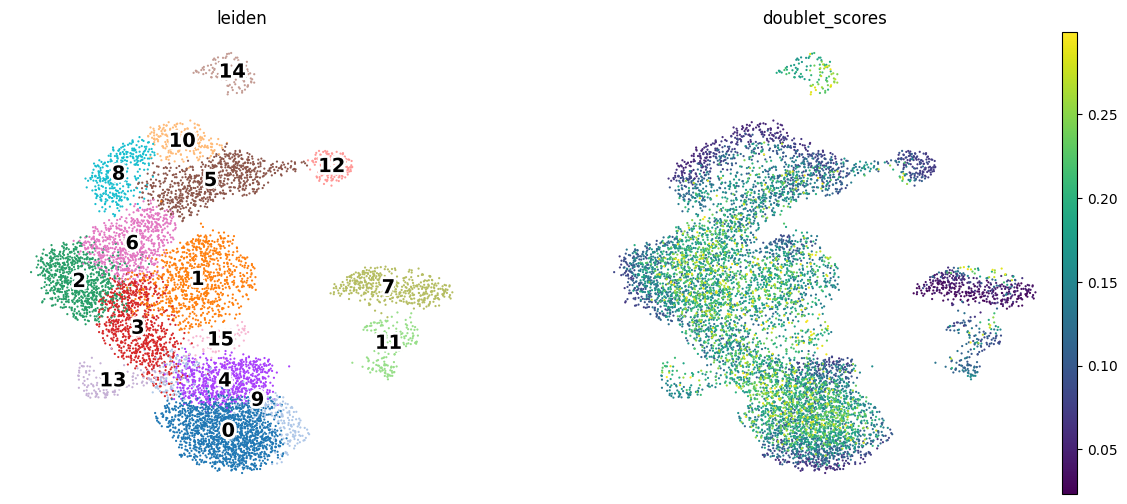

In [43]:
plt.rcParams['figure.figsize'] = (6, 6)
sc.pl.umap(adata, color=['leiden','doublet_scores'],s=10,show=False,frameon=False,legend_loc='on data',ncols=2,legend_fontsize=14,legend_fontoutline=4)


[<AxesSubplot:title={'center':'TOP2A'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'CD14'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'MPO'}, xlabel='UMAP1', ylabel='UMAP2'>]

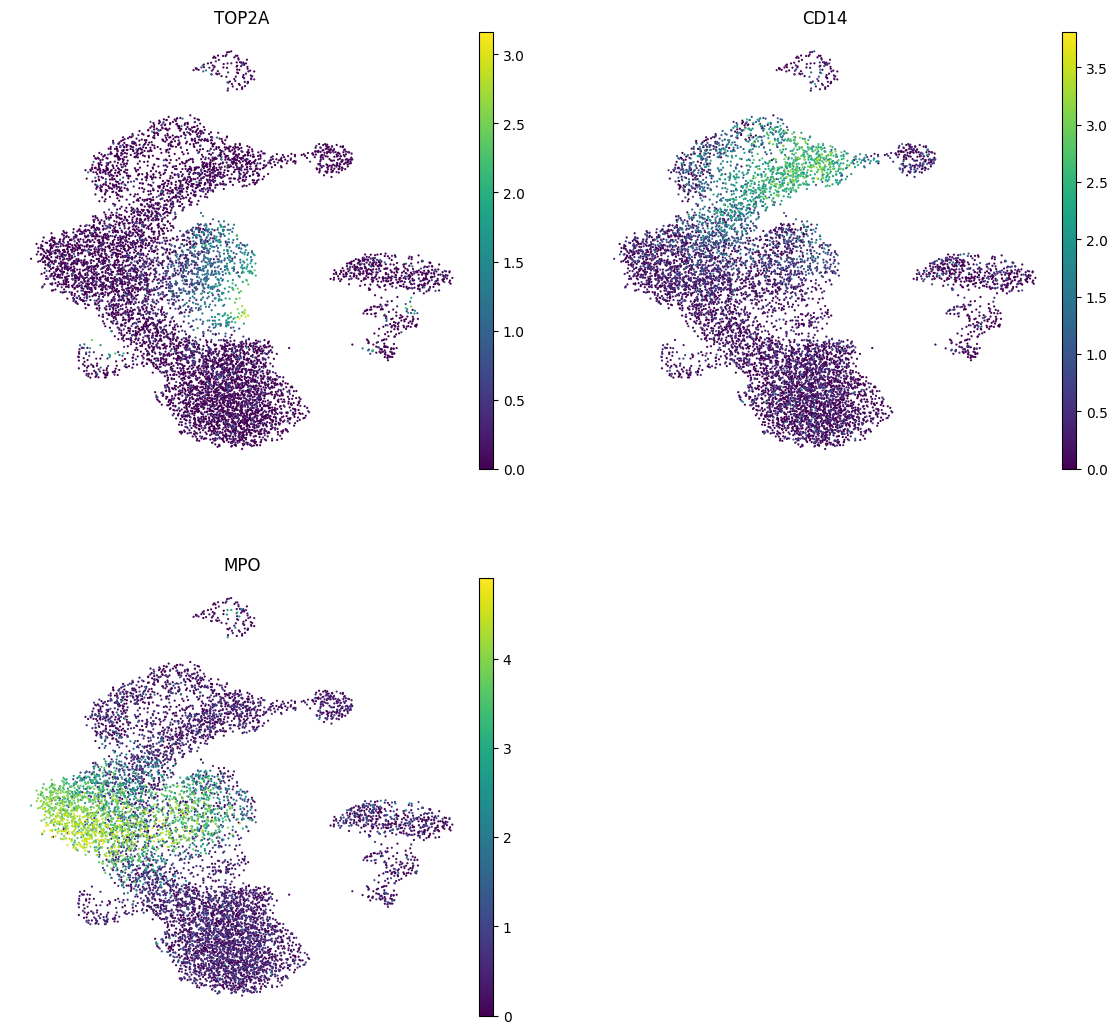

In [46]:
plt.rcParams['figure.figsize'] = (6, 6)
sc.pl.umap(adata, color=['TOP2A','CD14','MPO'],s=10,show=False,frameon=False,legend_loc='on data',ncols=2,legend_fontsize=14,legend_fontoutline=4)


In [47]:
adata.write_h5ad('STAG_AML_final.h5ad',compression='gzip')